# The social aspect of  cryptocurrencies
This will analyze different cryptocurrencies in order to get insight into ROI, country of origin, and number of exchanges listed


### How does exchange listing affect the price of a coin?
#### Will coins listed in more exchanges have a higher appreciation in price?


### From the top 100 coins, how many coins have appreciated double digits? triple? quadruple?

### Does country of origin affect price of coin?


### What is the relationship between market cap and percentage gains in the last 3 years?

### How has internet interactions changed over the last 3 years for cryptocurrencies?

#### Look at twitter followers for accounts, re

In [185]:
%matplotlib notebook

In [31]:
#import dependencies
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from matplotlib import pyplot as plt
import os
import seaborn as sns

In [58]:
# Import csv and convert them to Data frames
# Set up path
crypto_path = os.path.join("data", "cryptocurrencies_data_2021.csv")
# Load csv and drop extra column "Unnamed: 0"
crypto_data_2021_df = pd.read_csv(crypto_path).drop(columns='Unnamed: 0')
crypto_data_2021_df.nunique()

id                          2250
symbol                      2182
price_04-22-21              2116
market_cap_billion(2021)    2250
market_cap_rank             2250
ath                         2003
ath_change_percentage       2245
ath_date                    1980
atl                         2151
atl_change_percentage       2247
atl_date                    2198
dtype: int64

In [48]:
uniform_data = np.random.rand(10, 12)
pd.DataFrame(uniform_data)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.631407,0.349170,0.385242,0.442738,0.598356,0.821504,0.085947,0.743945,0.469169,0.742014,0.884709,0.005983
1,0.142654,0.663531,0.225056,0.466772,0.786140,0.730286,0.264367,0.215848,0.093243,0.851189,0.751091,0.991406
2,0.333904,0.446478,0.451409,0.230231,0.297512,0.498972,0.929256,0.659302,0.769366,0.991447,0.153026,0.784314
3,0.407175,0.839437,0.072179,0.403945,0.534951,0.039713,0.801976,0.519184,0.960382,0.025706,0.583292,0.712357
4,0.188493,0.551592,0.376137,0.245786,0.580274,0.137134,0.014447,0.416456,0.309572,0.309230,0.729689,0.690851
5,0.601051,0.988783,0.815057,0.866324,0.956002,0.640060,0.605162,0.586395,0.172276,0.704204,0.121440,0.147376
6,0.617360,0.975805,0.152221,0.339088,0.274285,0.151893,0.788577,0.220754,0.014852,0.909970,0.342949,0.295282
7,0.054677,0.249318,0.644736,0.928368,0.743821,0.607091,0.653143,0.724060,0.951458,0.736559,0.263013,0.468296
8,0.111305,0.709869,0.480125,0.650293,0.551776,0.140850,0.231688,0.684515,0.412610,0.453126,0.967671,0.752028
9,0.578451,0.679865,0.418379,0.553293,0.483864,0.186008,0.984538,0.432075,0.715025,0.398064,0.252449,0.780659


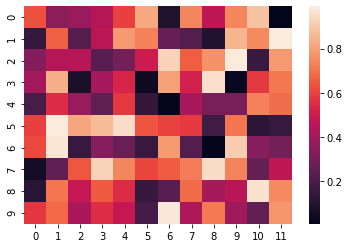

In [49]:
ax = sns.heatmap(uniform_data)

In [55]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [56]:
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


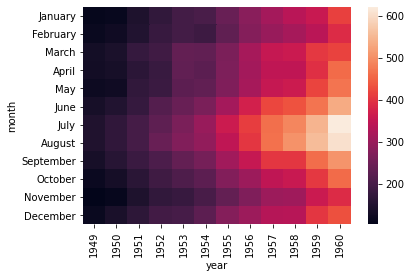

In [57]:
ax = sns.heatmap(flights)

In [11]:
# Import social_metrics csv and make it a data frame  "clean_2018_df"
crypto_social_path = os.path.join("data", "social_data_coins_2018.csv")
crypto_social_df = pd.read_csv(crypto_social_path).drop(columns='Unnamed: 0')
crypto_social_df.nunique()

id                               1165
price 01-04-2018                  293
reddit_subscribers 01-04-2018     224
twitter_followers 01-04-2018      279
alexa_rank 01-04-2018             272
dtype: int64

In [61]:
# Clean Data frames by dropping NAN values
clean_2018_df = crypto_social_df.dropna()
clean_2018_df.nunique()

id                               209
price 01-04-2018                 209
reddit_subscribers 01-04-2018    207
twitter_followers 01-04-2018     208
alexa_rank 01-04-2018            207
dtype: int64

In [62]:
clean_2018_df.head()

,id,price 01-04-2018,reddit_subscribers 01-04-2018,twitter_followers 01-04-2018,alexa_rank 01-04-2018
0,bitcoin,6975.275314,785619.0,819312.0,5574.0
1,ethereum,395.796381,348116.0,382159.0,8204.0
2,binancecoin,11.115511,40605.0,176.0,230.0
3,ripple,0.511990,184063.0,843082.0,5224.0
5,cardano,0.155532,60486.0,124345.0,13650.0


In [73]:
def bar_plot(data_frame, x_values,y_column, color='b', fig_size = [10,5]):
    # Define size of figure
    plt.figure(figsize = fig_size)
    # arrange x_axis values based in the lenght of the Data Frame
    x_axis = np.arange(len(data_frame))
    # Use a list comprehension to adjust x ticks location if needed
    tick_locations = [value for value in x_axis]
    # define y values
    y_values = data_frame[f"{y_column}"]
    # plot x and y values, 
    plt.bar(x_axis, y_values, alpha=0.5, color=f'{color}')
    # place x ticks at the locations we calculated earlier, utilize the x values as labels, rotate and resize ticks
    plt.xticks(tick_locations, data_frame[f"{x_values}"], rotation='vertical', size=9)
    # label graph
    plt.xlabel("Cryptocurrency")
    plt.ylabel(f"{y_column}")
    title = plt.title(f"{y_column} vs {x_values}")
    # annotate figures with twitter handle because thieves
    plt.annotate("@johannvillalvir", [50, 700000], color="b")
    # make the layout fit in the screen size
    plt.tight_layout()
    # show the grapgh
    plt.show()



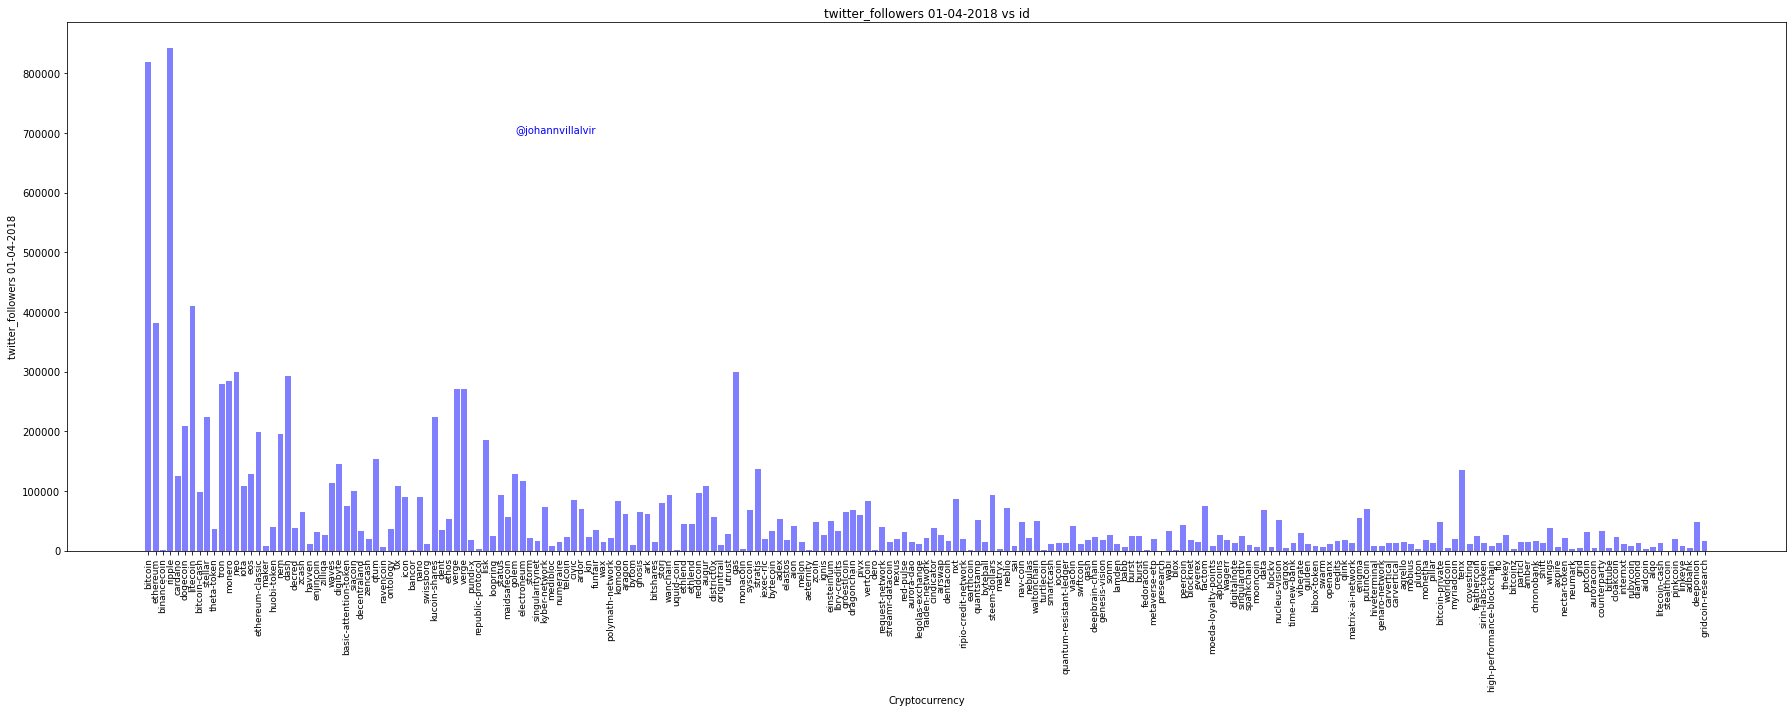

<Figure size 432x288 with 0 Axes>

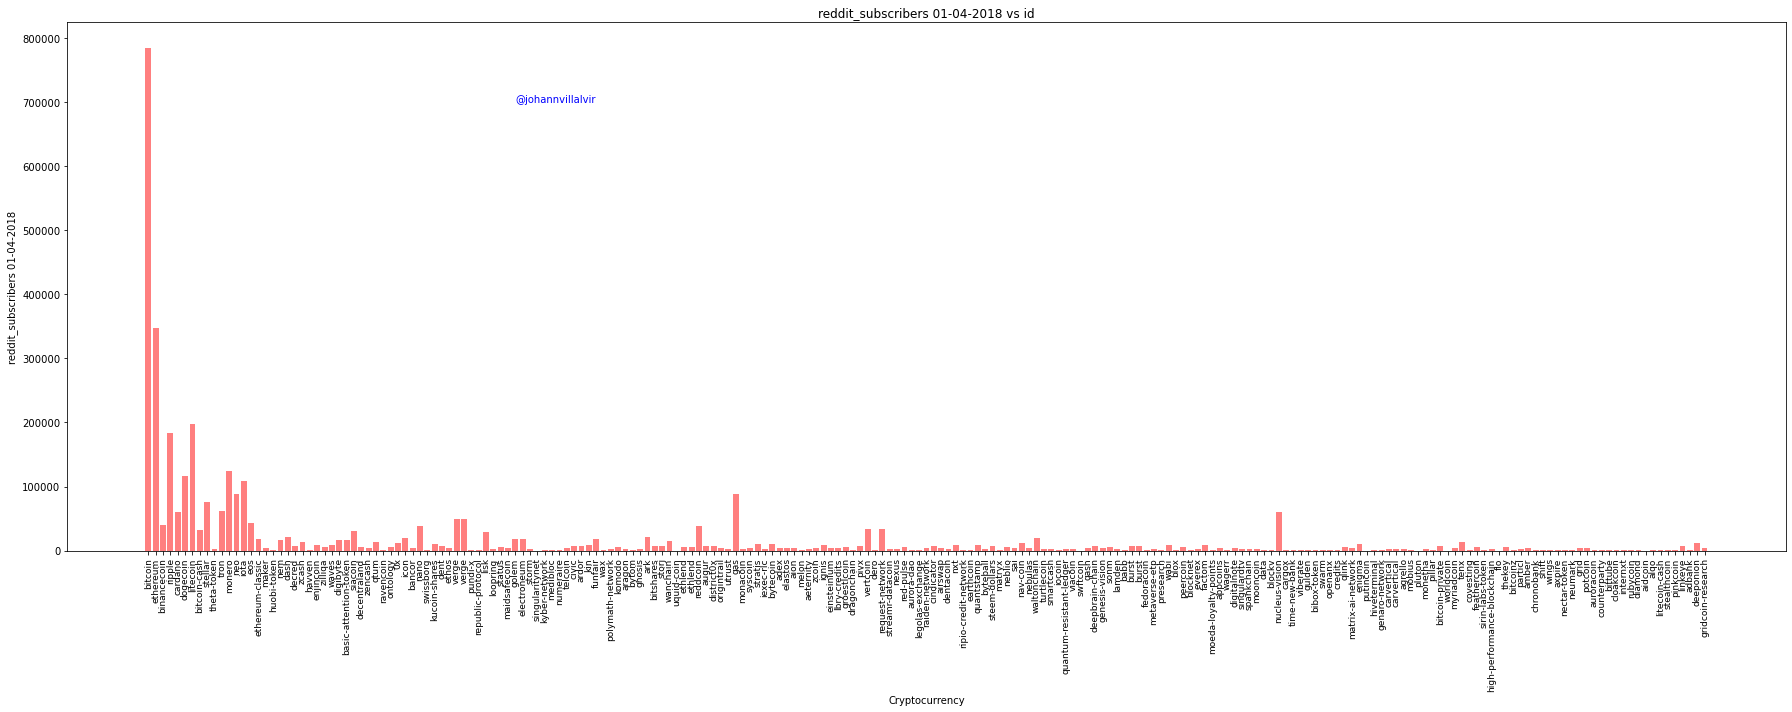

<Figure size 432x288 with 0 Axes>

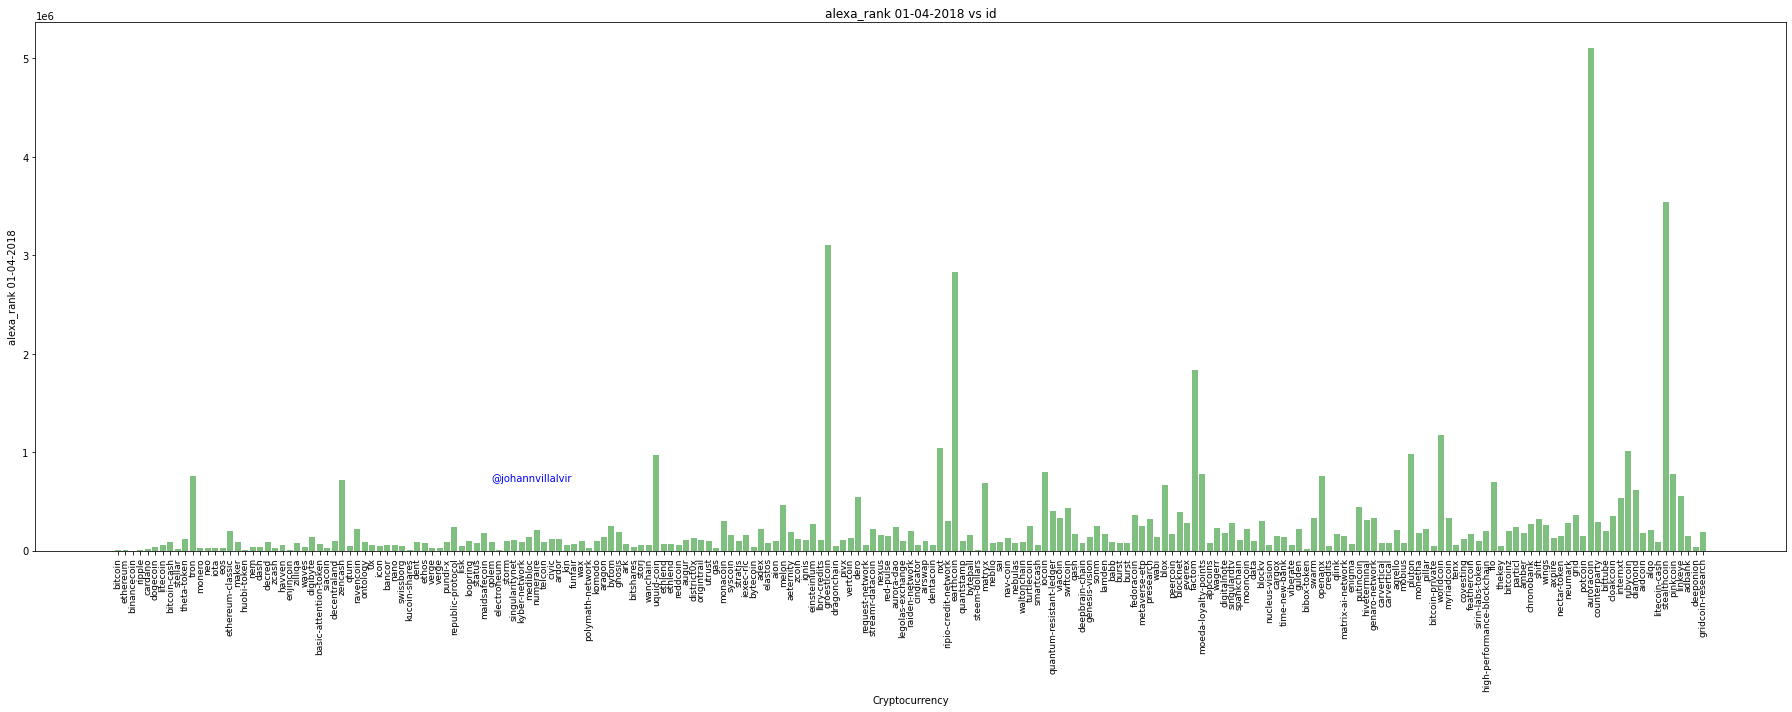

<Figure size 432x288 with 0 Axes>

In [74]:
# What is the relationship between social media activity and market cap?
# Make a graph for twitter followers
twitter_metrics = bar_plot(clean_2018_df, 'id', 'twitter_followers 01-04-2018', fig_size =[25, 10])
# Save the image
plt.savefig("crypto_twitter_2018.png")

# Make graph for reddit users
reddit_metrics = bar_plot(clean_2018_df,'id', 'reddit_subscribers 01-04-2018', 'red', [25, 10])
# Save the image
plt.savefig("crypto_reddit_2018.png")

# Plot alexa metrics
alexa_metrics = bar_plot(clean_2018_df, 'id', 'alexa_rank 01-04-2018', 'green', [25, 10])
# Save the image
plt.savefig("crypto_alexa_rank_2018.png")

In [ ]:
# Make empty list for 2021
coin_data_2021 = []
# use function to get requests based on date and append them to list
obtain_metrics_by_date(coin_data_2021, '01-04-2021')

In [ ]:
coin_data_2021

In [ ]:
_2021_df = pd.DataFrame(coin_data_2021)
len(_2021_df)

In [ ]:
clean_2021_df = _2021_df.dropna()

In [ ]:
len(clean_2021_df)

In [ ]:
bar_plot(clean_2021_df, 'id', 'reddit_subscribers 01-04-2021', 'r')
plt.savefig("images/crypto_reddit_2018.png")

In [ ]:
bar_plot(clean_2021_df, 'id', 'twitter_followers 01-04-2021') 
plt.savefig("images/crypto_twitter_2021.png")

In [ ]:
bar_plot(clean_2021_df, 'id', 'alexa_rank 01-04-2021', 'g')
plt.savefig("images/crypto_alexa_rank_2021.png")

In [ ]:
# merge both data frames to get full picture of social metrics between 2018 and 2021
social_metrics_merged_df = pd.merge(clean_2018_df, clean_2021_df,on="id", how="right")
#social_metrics_merged_df.dropna(inplace=True)
social_metrics_merged_df.head()

In [ ]:
clean_social_metrics_merged_df = social_metrics_merged_df.dropna()
clean_social_metrics_merged_df.head()

In [182]:
# create a function to do a scatter plot
def scatter_plot(dataframe, x_values, y_values, fig_size=[9,5], color='red', edgecolor='black', marker='o'):

    plt.figure(figsize = fig_size)
    x_axis = dataframe[f"{x_values}"]
    y_axis = dataframe[f"{y_values}"]
    plt.scatter(x_axis, y_axis, color=f"{color}", edgecolor=f"{edgecolor}", marker=f"{marker}")
    plt.xlabel(f"{x_axis.name}")
#    plt.ylim((min(dataframe[f"{y_values}"]) * (-1.5)), (max(dataframe[f"{y_values}"]) * 1.1))
    plt.ylabel(f"{y_axis.name}")
    plt.tight_layout()
    plt.show()
#    print(plt.ylim(min(dataframe[f"{y_values}"]), max(dataframe[f"{y_values}"])))
    


In [ ]:
#(min(dataframe[f"{y_values}"]) *.5)
#(max(dataframe[f"{y_values}"]) * 2)

In [167]:
max(clean_social_metrics_merged_df['price 01-04-2018'])*1.1

7672.802845422836

<IPython.core.display.Javascript object>


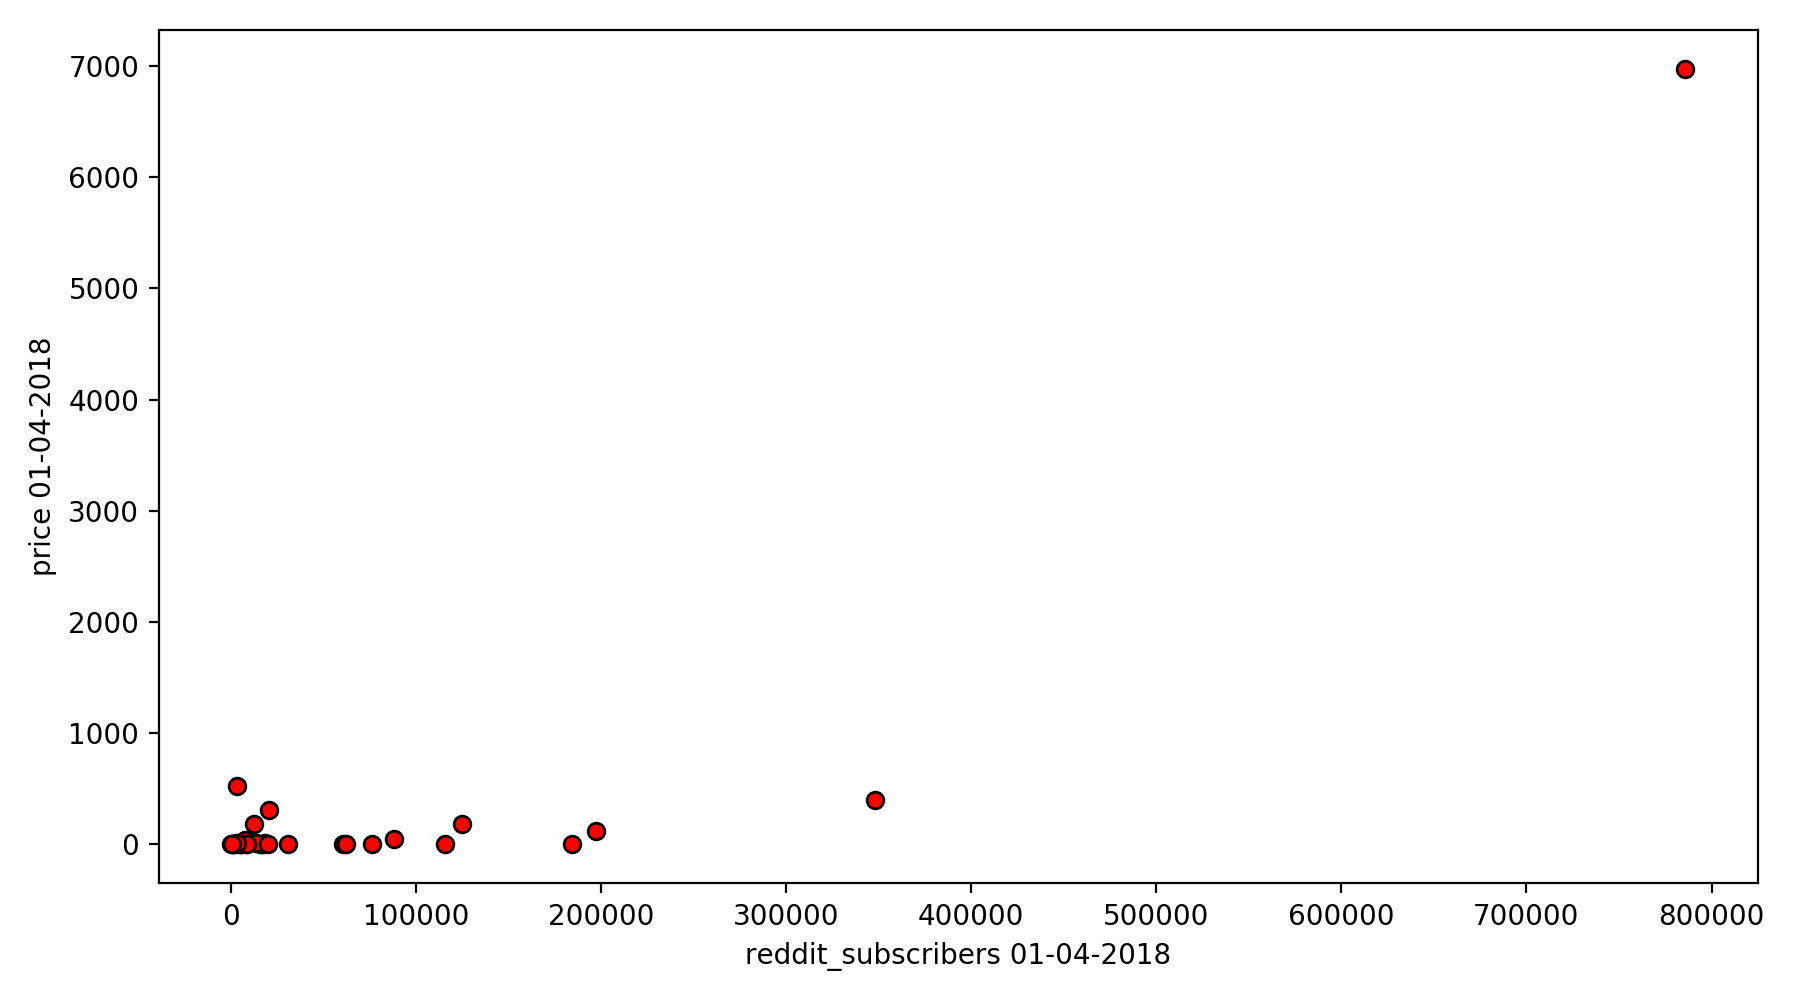

In [183]:
scatter_plot(clean_social_metrics_merged_df, 'reddit_subscribers 01-04-2018', 'price 01-04-2018')
#plt.savefig("images/reddit_vs_price_2018.png")

In [ ]:
scatter_plot(clean_social_metrics_merged_df, "twitter_followers 01-04-2018", "price 01-04-2018", fig_size = [10,5], color='b')

In [ ]:
social_metrics_merged_df.columns

In [ ]:
scatter_plot(social_metrics_merged_df,'price 01-04-2018','alexa_rank 01-04-2018', color='g')

In [ ]:
clean_2018_df.columns

In [ ]:
scatter_plot(clean_2018_df, 'price 01-04-2018', 'reddit_subscribers 01-04-2018')